In [1]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install -q kaggle
!kaggle datasets download -d crowdflower/twitter-airline-sentiment
!unzip twitter-airline-sentiment.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment
License(s): CC-BY-NC-SA-4.0
  0% 0.00/2.55M [00:00<?, ?B/s]
100% 2.55M/2.55M [00:00<00:00, 717MB/s]
Archive:  twitter-airline-sentiment.zip
  inflating: Tweets.csv              
  inflating: database.sqlite         


In [3]:
#Import Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
#Download VADER Lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [11]:
#Load the Dataset
df = pd.read_csv('Tweets.csv', usecols=['airline_sentiment', 'text'])
df.head()
df = df.dropna().rename(columns={'airline_sentiment': 'actual_sentiment', 'text': 'tweet'})

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('airline_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['text'].value_counts()
    for x_label, grp in _df_2.groupby('airline_sentiment')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('airline_sentiment')
_ = plt.ylabel('text')

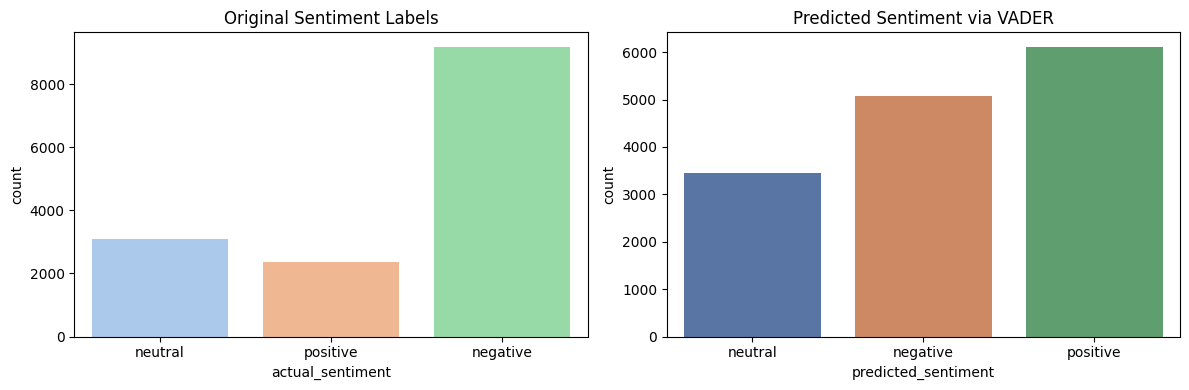

In [15]:
#Initialize VADER
analyzer = SentimentIntensityAnalyzer()

#Function to Convert Compound Score to Sentiment Label
def analyze_sentiment(tweet):
    score = analyzer.polarity_scores(tweet)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'
#Apply Sentiment Analysis to Tweets
df['predicted_sentiment'] = df['tweet'].apply(analyze_sentiment)

#Visual Comparison of Actual vs Predicted Sentiments
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(ax=axes[0], data=df, x='actual_sentiment', hue='actual_sentiment', palette='pastel', legend=False)
axes[0].set_title('Original Sentiment Labels')
sns.countplot(ax=axes[1], data=df, x='predicted_sentiment', hue='predicted_sentiment', palette='deep', legend=False)
axes[1].set_title('Predicted Sentiment via VADER')
plt.tight_layout()
plt.show()


In [17]:
#Evaluation Report
from sklearn.metrics import classification_report
print("Sentiment Classification Report (VADER vs Ground Truth):\n")
print(classification_report(df['actual_sentiment'], df['predicted_sentiment']))

Sentiment Classification Report (VADER vs Ground Truth):

              precision    recall  f1-score   support

    negative       0.90      0.50      0.64      9178
     neutral       0.38      0.43      0.40      3099
    positive       0.34      0.87      0.49      2363

    accuracy                           0.54     14640
   macro avg       0.54      0.60      0.51     14640
weighted avg       0.70      0.54      0.57     14640

